In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
store_data = pd.read_csv('../input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252')

In [3]:
del store_data['Row ID']

In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [5]:
store_data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
# here first we convert our datatype to datetime datatype
store_data['Ship Date'] = pd.to_datetime(store_data['Ship Date'])
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'])

# now we convert our date into dd-mm-yyyy formate but it remain in str datatype
store_data['Ship Date']=store_data['Ship Date'].dt.strftime('%d-%m-%Y')
store_data['Order Date']=store_data['Order Date'].dt.strftime('%d-%m-%Y')

# now if convert datatype our date formate will be change to yyyy-mm-dd
store_data['Ship Date'] = pd.to_datetime(store_data['Ship Date'])
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'])

 # > **Each city sales**

In [7]:
city_sale = store_data.groupby(['City']).Sales.sum()

In [8]:
import matplotlib.pyplot as plt

In [9]:
city_sale = city_sale.sort_values(ascending = False)

Text(0, 0.5, 'Sales')

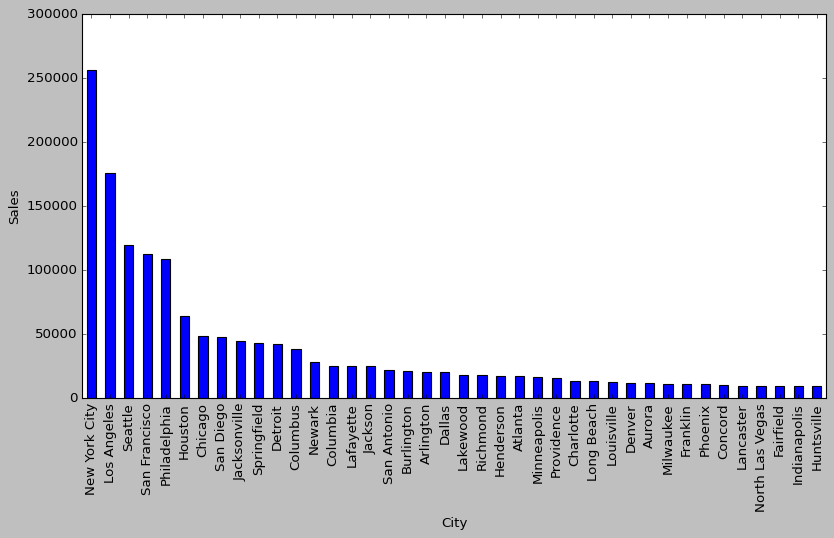

In [10]:
plt.style.use('classic')
plt.figure(figsize=(12,6))
city_sale[:40].plot.bar(y='sales',rot=90)
plt.ylabel('Sales')

# maximum sale subcategory

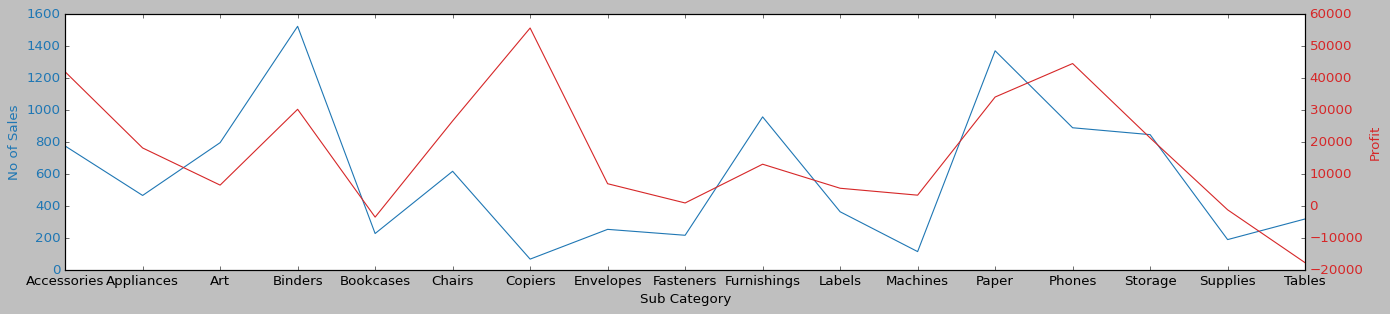

In [11]:
subCategorySale = store_data.groupby('Sub-Category').Sales.count()
subCategoryProfit = store_data.groupby('Sub-Category').Profit.sum()
fig,ax1 = plt.subplots(figsize=(20,4)) # use to make two plot on same 

ax1.set_xlabel('Sub Category')
ax1.set_ylabel('No of Sales',color = 'tab:blue')
ax1.plot(subCategorySale,color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()

ax2.set_ylabel('Profit',color= 'tab:red')
ax2.plot(subCategoryProfit,color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.show()

# Which segment purchase most

Text(0.5, 1.0, 'Sales in each segment')

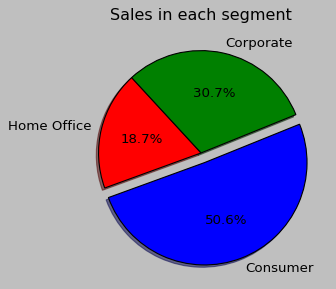

In [12]:
segment = store_data.groupby('Segment').Sales.sum()
All_segment=['Consumer','Corporate','Home Office']
plt.figure(figsize=(6,4))
plt.pie(segment,labels=All_segment,explode=(0.1,0,0),autopct='%1.1f%%',shadow=True,startangle=200)
plt.title('Sales in each segment')

# Shipping Mode

<AxesSubplot:xlabel='Ship Mode'>

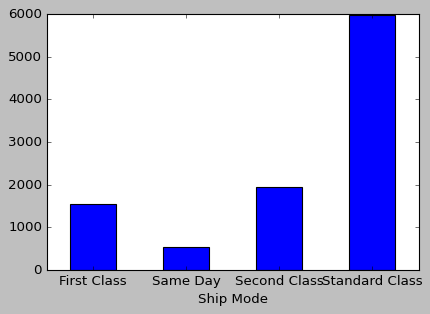

In [13]:
shipmode =store_data.groupby('Ship Mode').Category.count()
plt.figure(figsize=(6,4))
shipmode.plot.bar(rot =0)

# **Which Category has maximum purchase **

In [14]:
Category = store_data.groupby('Category').Category.count()
Profit = store_data.groupby('Category').Profit.sum()
cat_pro = pd.DataFrame({'Category_sale':Category,'Profit':Profit})

In [15]:
cat_pro =cat_pro.reset_index()
cat_pro

,Category,Category_sale,Profit
0,Furniture,2121,18451.2728
1,Office Supplies,6026,122490.8008
2,Technology,1847,145454.9481


<Figure size 640x320 with 0 Axes>

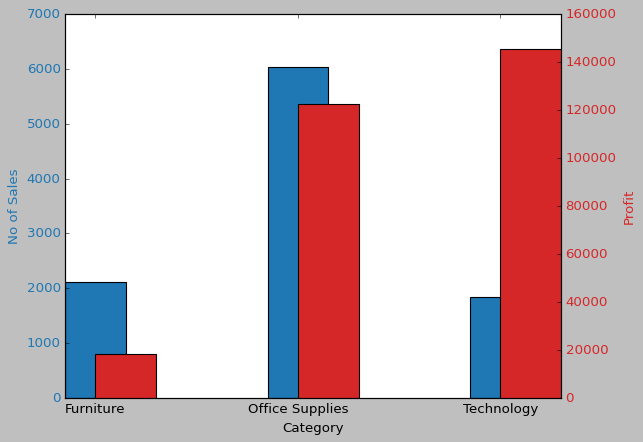

In [16]:
plt.figure(figsize=(8,4))
fig,ax1 = plt.subplots() # use to make two plot on same 

ax1.set_xlabel('Category')
ax1.set_ylabel('No of Sales',color = 'tab:blue')
ax1.bar(cat_pro['Category'],cat_pro['Category_sale'],color = 'tab:blue',align='center',width=0.3)
ax1.tick_params(axis='y', labelcolor='tab:blue') # to colour y lables(values)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Profit',color= 'tab:red')
ax2.bar(cat_pro['Category'],cat_pro['Profit'],color = 'tab:red',align='edge',width=0.3)
ax2.tick_params(axis='y', labelcolor='tab:red')


#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Each Category sale at Every date of a month

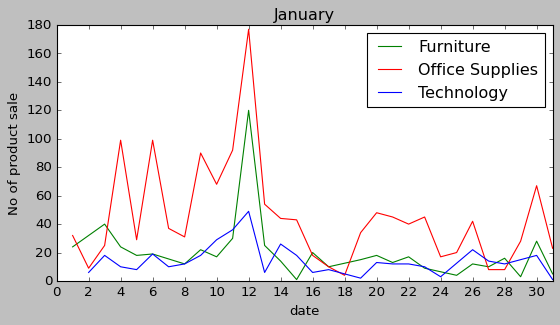

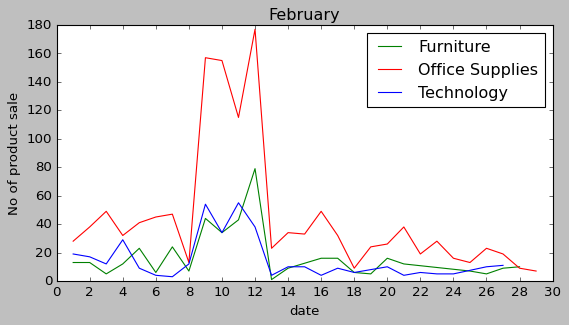

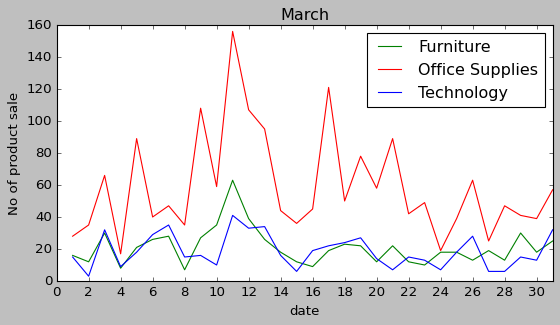

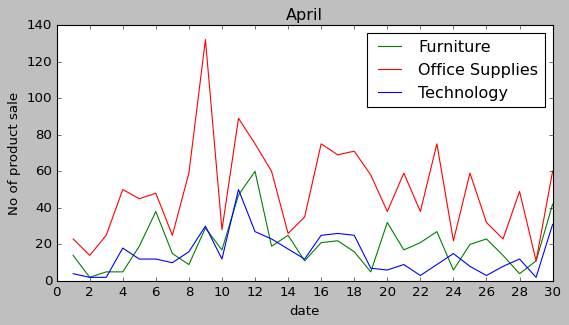

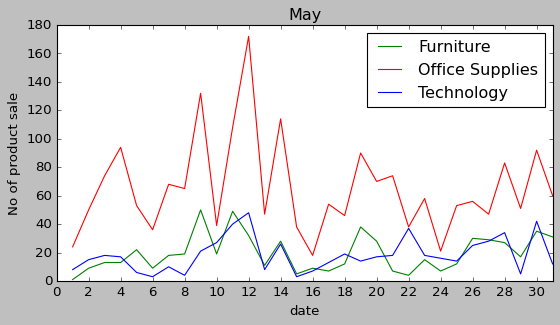

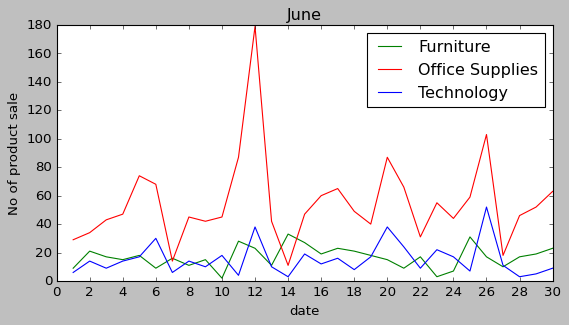

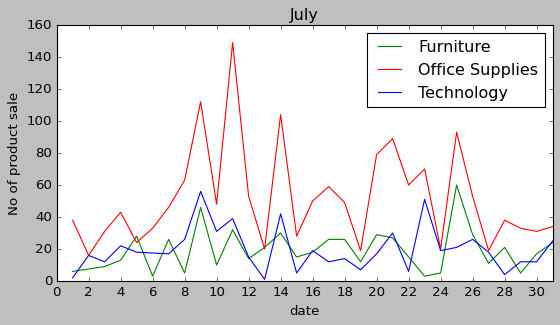

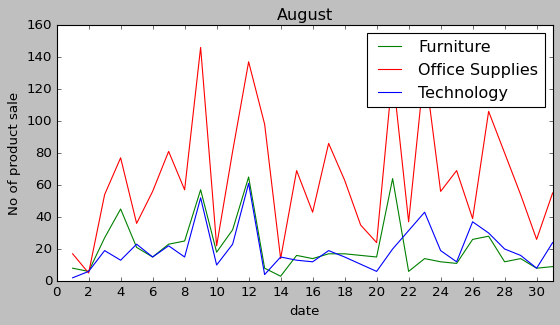

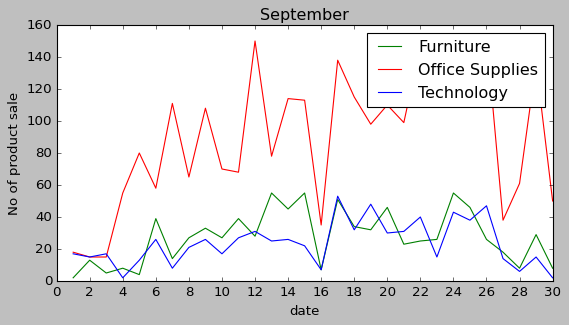

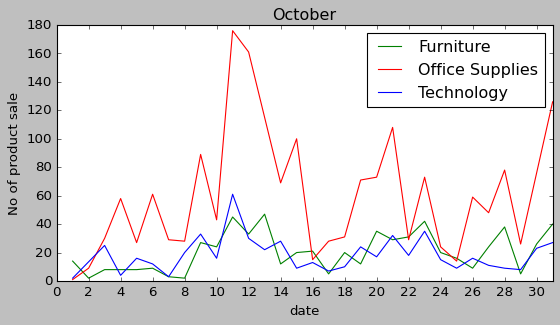

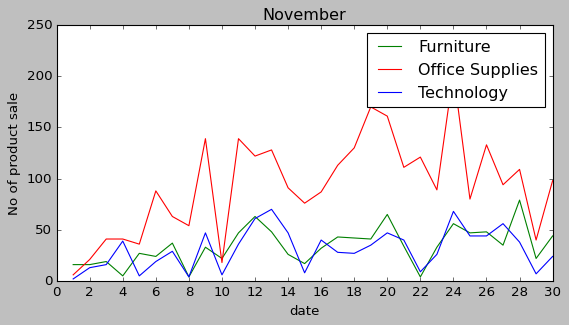

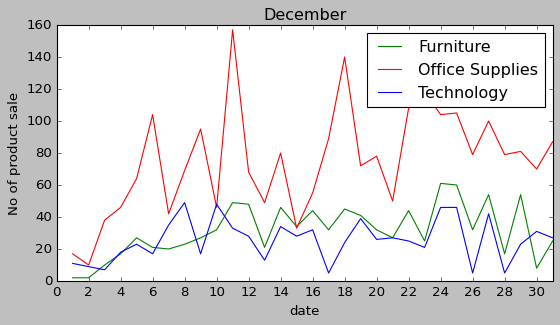

In [17]:
store_data['date'] = store_data['Order Date'].dt.day
store_data['month'] = store_data['Order Date'].dt.strftime("%B")
date_sale = store_data.groupby(['Category','month','date']).Quantity.sum()

All_months = ['waste','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cate = ['Furniture','Office Supplies','Technology']
d = ['g-','r-','b-']
for y in range(1,13):
    plt.figure(figsize=(8,4))
    for u in range(3):
        x = range(0,31,2)
        temp = date_sale[cate[u]][All_months[y]]
        plt.plot(temp,d[u])
        plt.xlabel('date')
        plt.xticks(x)
        plt.title(All_months[y])
        plt.ylabel('No of product sale')
    plt.legend(('Furniture', 'Office Supplies', 'Technology'),
           loc='upper right')
    plt.show()

# Region wise

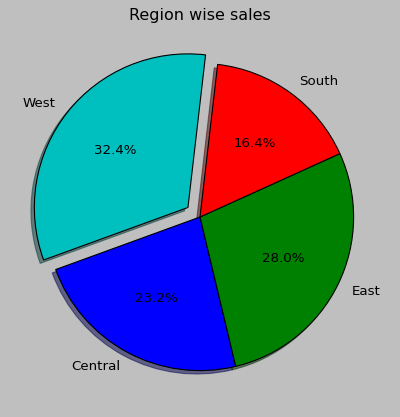

In [18]:
region = store_data.groupby('Region').Quantity.sum().reset_index()
explode = (0,0,0,0.1)  # this we use to get some part out we can make any value to any where
#lables
plt.pie(region['Quantity'],explode = explode,labels=region['Region'],autopct='%1.1f%%',shadow=True,startangle=200)
plt.title('Region wise sales')
plt.show()

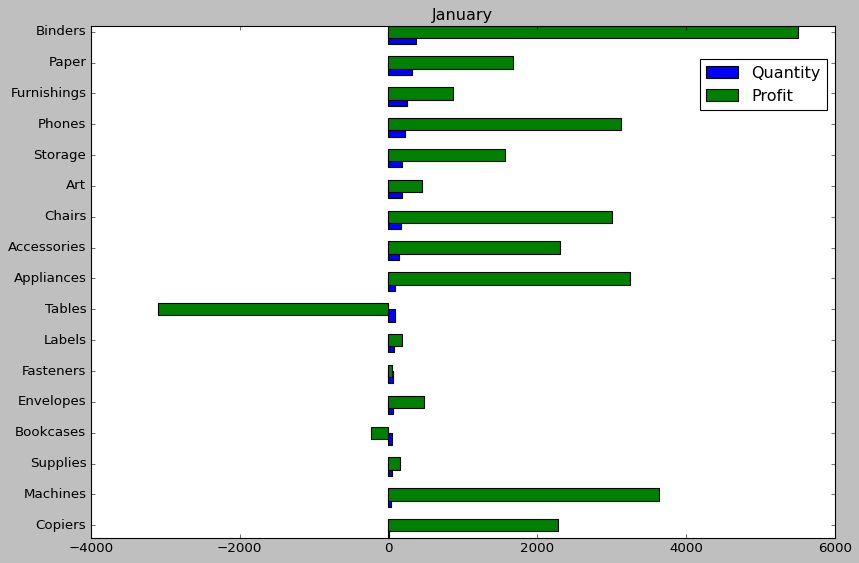

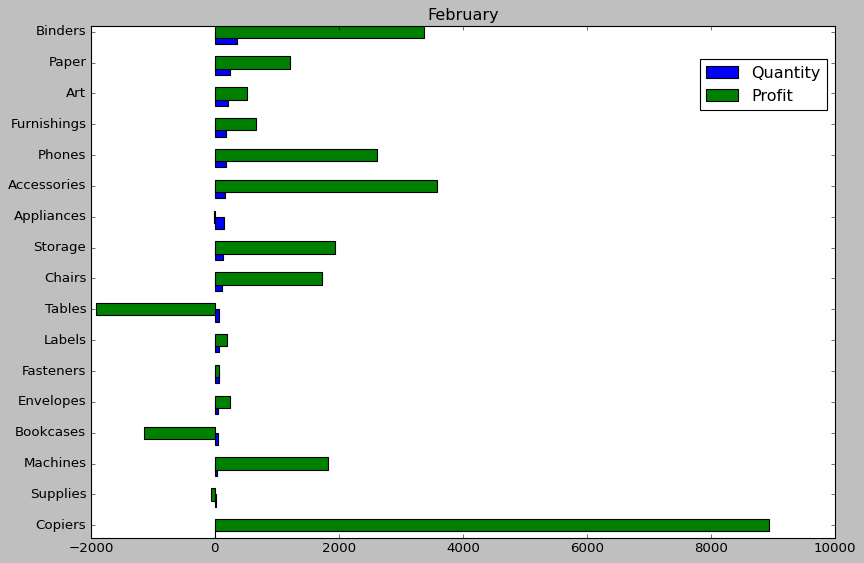

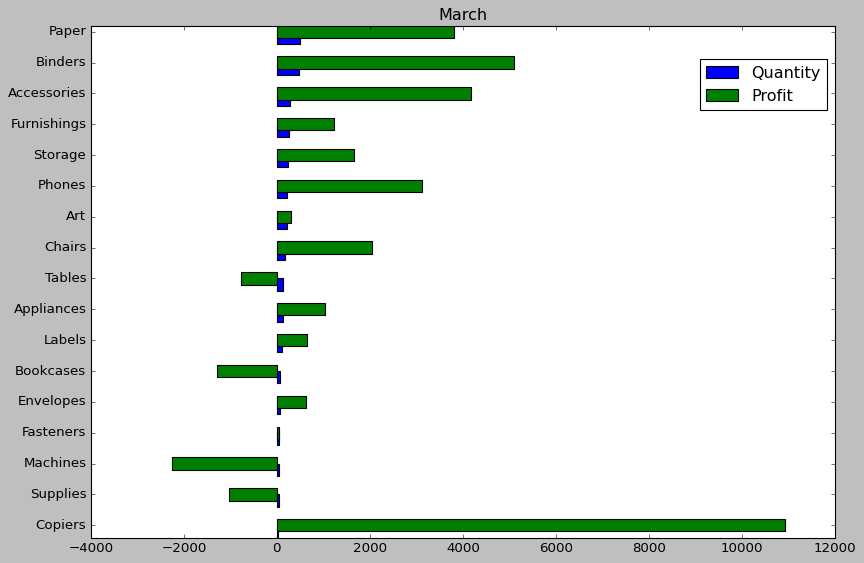

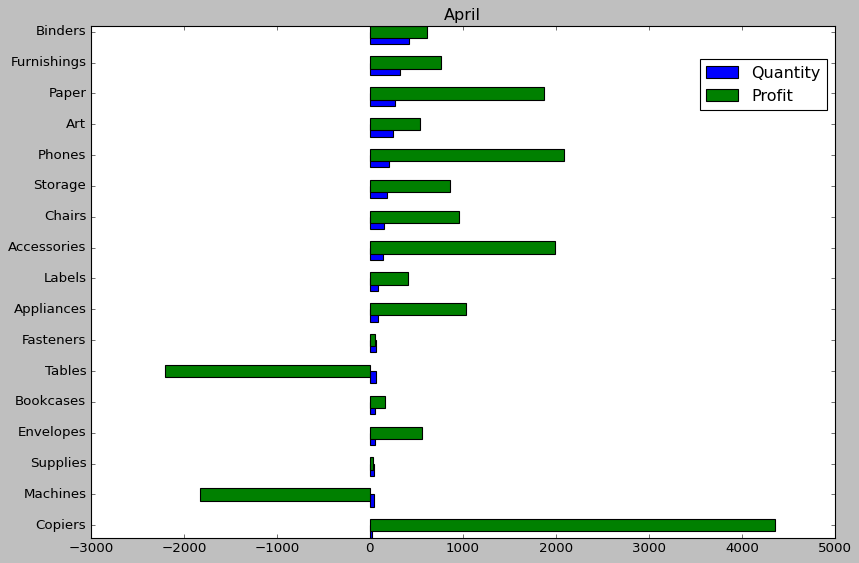

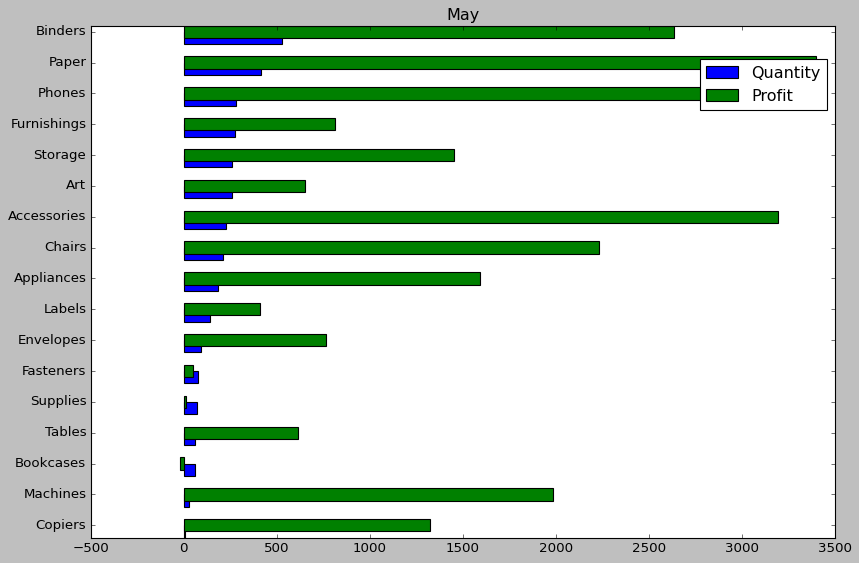

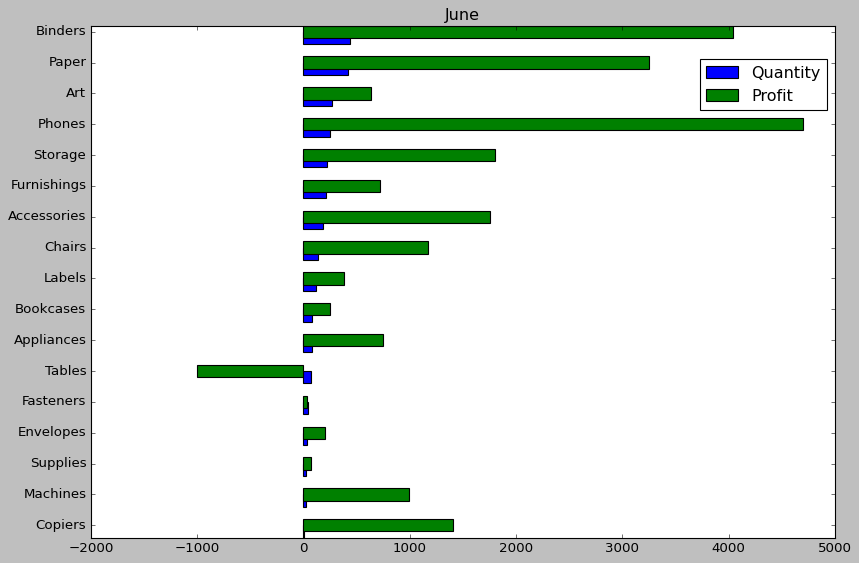

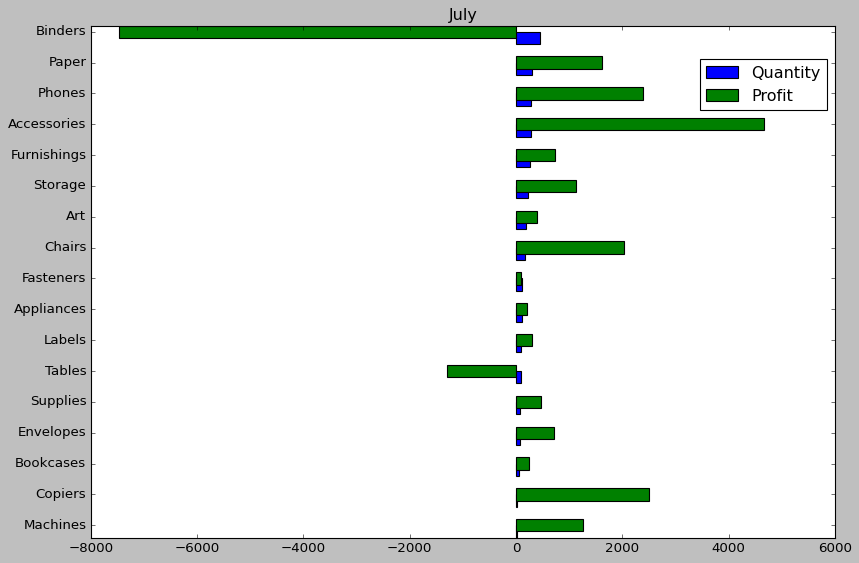

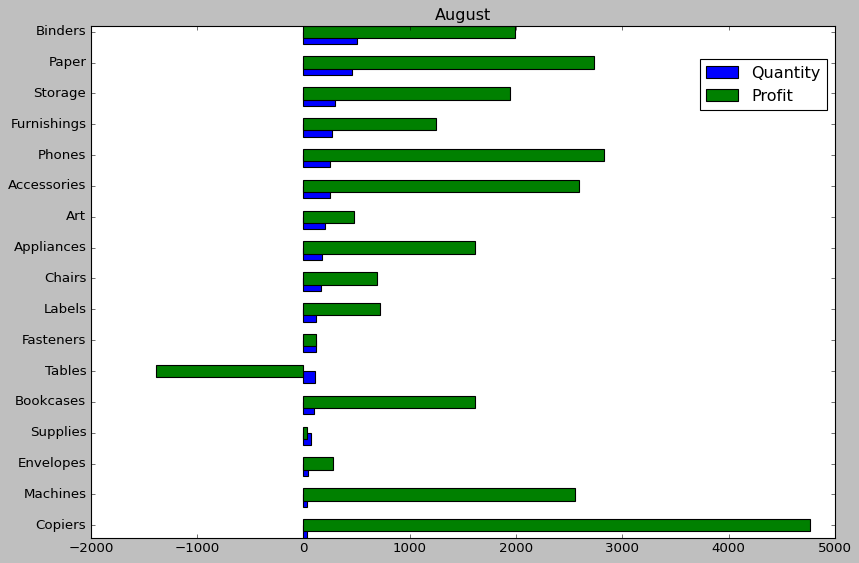

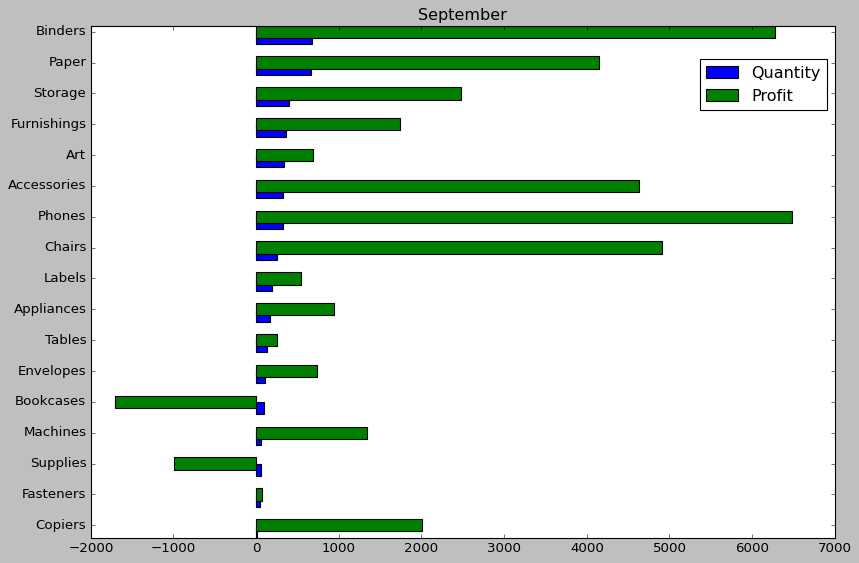

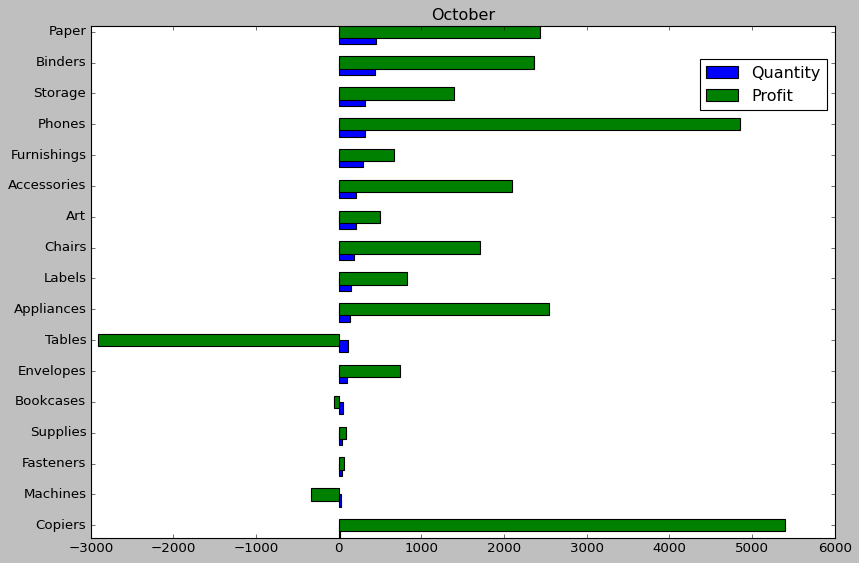

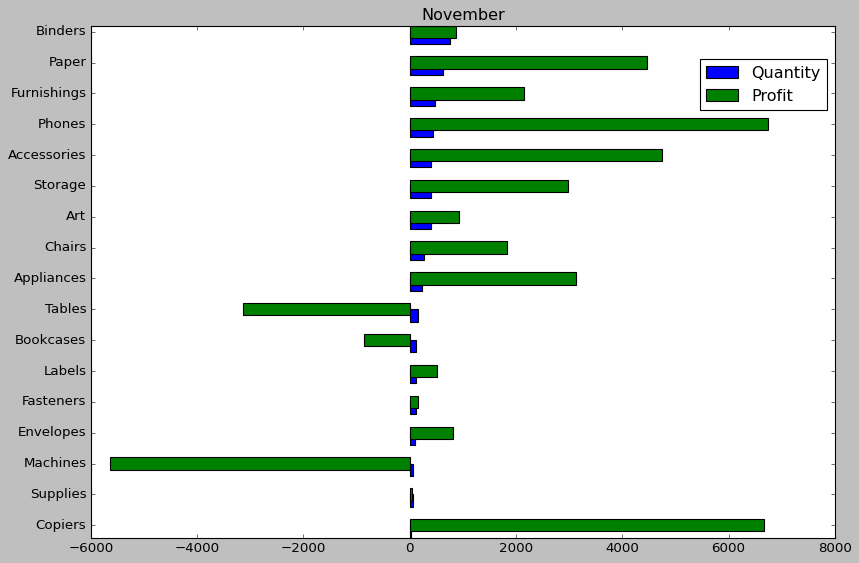

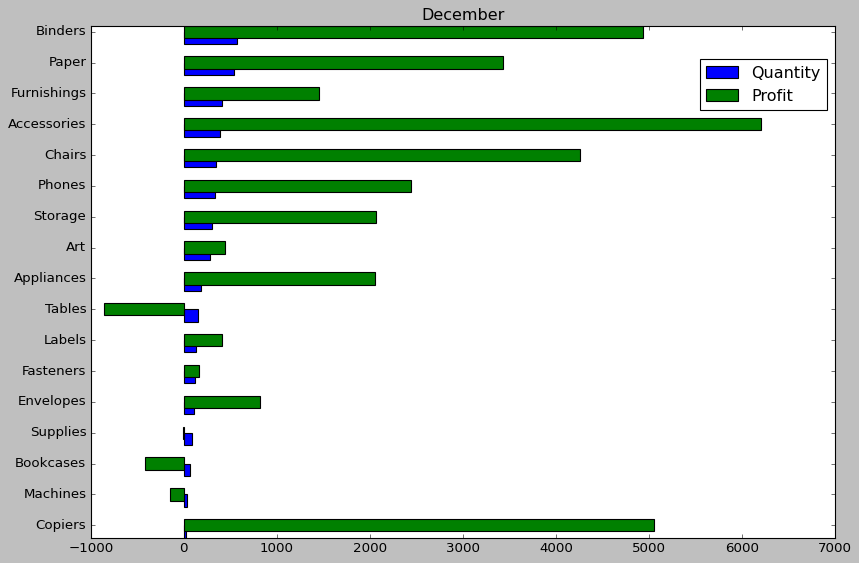

In [19]:
each_month = store_data.groupby(['month','Sub-Category'])[['Quantity','Profit']].sum()

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for x in range(12):
    plt.figure(figsize=(12,8))
    y = each_month.loc[month[x]].sort_values(by = 'Quantity',ascending = False)
    y=y.sort_values(by = 'Quantity')
    y=y.reset_index()
    plt.title(month[x])
    plt.barh(y['Sub-Category'],y['Quantity'],align ='edge',height = -0.4)
    plt.barh(y['Sub-Category'],y['Profit'],height = 0.4)
    plt.legend(('Quantity','Profit'),bbox_to_anchor=(1, 0.95))
    plt.show()

# No of days take for shipping for each product

In [20]:
store_data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,date,month
0,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,August
1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,August
2,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,December
3,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,November
4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,21,January
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,26,February
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,26,February
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,26,February


In [21]:
store_data['Date Difference'] = (store_data['Ship Date'] - store_data['Order Date']).dt.days

there is some date difference which is negative so we can't take it

In [22]:
temp_data = store_data
temp_data['DateDifference'] = temp_data['Date Difference']
temp_data = temp_data.loc[temp_data['Date Difference'] >0] # not take that row where difference is negative
temp_data.groupby('Sub-Category').DateDifference.agg([pd.Series.mode,pd.Series.mean,pd.Series.median,min,max,])

,mode,mean,median,min,max
Sub-Category,,,,,
Accessories,4,45.737977,5.0,1,214
Appliances,4,42.843407,5.5,1,214
Art,4,45.453968,5.0,1,214
Binders,4,43.972268,5.0,1,214
Bookcases,4,39.856354,5.0,1,214
Chairs,4,42.429461,5.0,1,214
Copiers,5,49.700000,6.0,1,213
Envelopes,4,42.417112,5.0,1,214
Fasteners,4,45.816456,5.0,1,213


# No of customer for each retain times

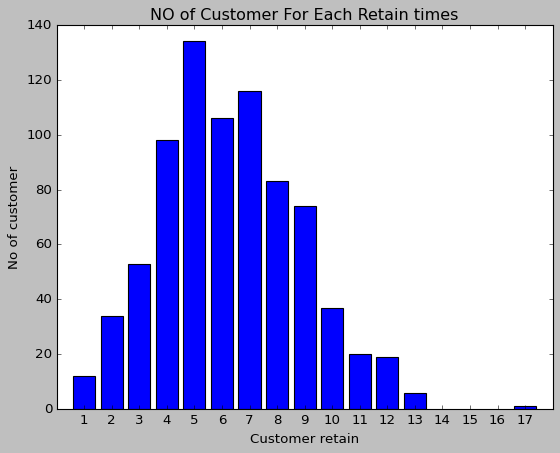

In [23]:
temp=store_data.groupby(['Order Date','Customer ID'])[['Sales','Quantity']].sum().reset_index()
customer=temp.groupby('Customer ID')[['Quantity','Sales']].count().reset_index()
customer_retention = customer.groupby('Quantity').Sales.count().reset_index()
lab= range(1,18)
plt.bar(customer_retention['Quantity'],customer_retention['Sales'])
plt.xlabel('Customer retain')
plt.ylabel('No of customer')
plt.xticks(lab)
plt.title('NO of Customer For Each Retain times')
plt.show()

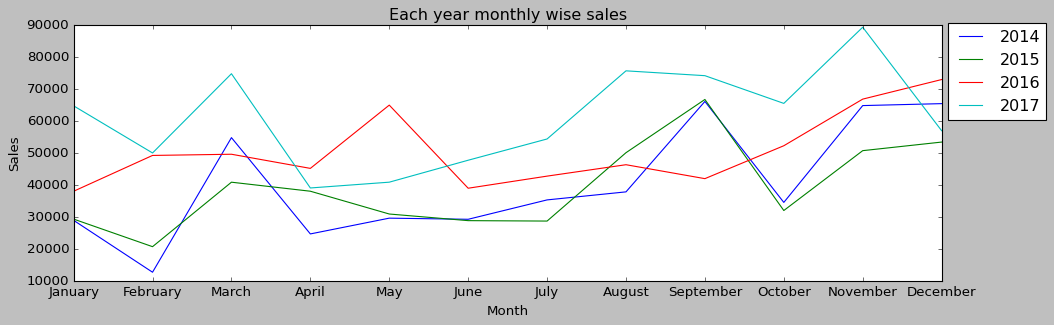

In [24]:
store_data['year']=store_data['Order Date'].dt.year
year_sale = store_data.groupby(['year','month']).Sales.sum()
year = [2014,2015,2016,2017]
plt.figure(figsize=(14,4))
for x in year:
    each_year = year_sale[x].reset_index()
    each_year.index = pd.CategoricalIndex(each_year['month'],categories=month,ordered=True) # this thing we do so that we can sort months
    #del each_year['month']
    each_year =each_year.sort_index().reset_index(drop=True)
    plt.plot(each_year['month'],each_year['Sales'])  # only this for plot
plt.legend(('2014','2015','2016','2017'), bbox_to_anchor=(1.13, 1.04))  # bbox for position
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Each year monthly wise sales')
plt.show()

In [25]:
import calendar
t =store_data['Order Date'].dt.strftime("%B")
type(t[0])

str